# Exploratory Data Analysis

Data and information retrieved from the UCI Machine Learning Repository. <br>
https://archive.ics.uci.edu/ml/datasets/Drug+consumption+%28quantified%29 <br>
https://www.healthline.com/health/big-five-personality-traits#takeaway

In [1]:
#import necessary libraries
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
#verify data is in directory
#print(os.getcwd())
#print(os.listdir())

In [3]:
df = pd.read_csv('drug_consumption.csv', index_col=0)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,...,Never used,Never used,Never used,Never used,Never used,Never used,Never used,Used in last decade,Never used,Never used
1,2,25-34,Male,Doctorate,UK,White,29.0,52.0,55.0,48.0,...,Used in last month,Never used,Used in last decade,Never used,Used in last decade,Used in last year,Never used,Used in last month,Never used,Never used
2,3,35-44,Male,Professional certificate/diploma,UK,White,31.0,45.0,40.0,32.0,...,Never used,Never used,Never used,Never used,Never used,Never used,Used over a decade ago,Never used,Never used,Never used
3,4,18-24,Female,Masters,UK,White,34.0,34.0,46.0,47.0,...,Never used,Never used,Used in last decade,Never used,Never used,Never used,Never used,Used in last decade,Never used,Never used
4,5,35-44,Female,Doctorate,UK,White,43.0,28.0,43.0,41.0,...,Used over a decade ago,Never used,Never used,Used over a decade ago,Never used,Never used,Used in last decade,Used in last decade,Never used,Never used


### Make drug columns binomial
All drug columns are multilevel categorical values of usage. "Never used" and "Used over a decade ago" will be considered "Non-user" and all other classes will become "User" for binomial classification.

In [4]:
bi_use = ['Non-user', 'Non-user','User','User','User','User','User']
multi_use = ['Never used','Used over a decade ago','Used in last decade','Used in last year','Used in last month','Used in last week','Used in last day']

df.iloc[:,13:32] = df.iloc[:,13:32].replace(multi_use, bi_use)
df.head()

,ID,Age,Gender,Education,Country,Ethnicity,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,...,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,Semer,VSA
0,1,35-44,Female,Professional certificate/diploma,UK,Mixed-White/Asian,39.0,36.0,42.0,37.0,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
1,2,25-34,Male,Doctorate,UK,White,29.0,52.0,55.0,48.0,...,User,Non-user,User,Non-user,User,User,Non-user,User,Non-user,Non-user
2,3,35-44,Male,Professional certificate/diploma,UK,White,31.0,45.0,40.0,32.0,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user
3,4,18-24,Female,Masters,UK,White,34.0,34.0,46.0,47.0,...,Non-user,Non-user,User,Non-user,Non-user,Non-user,Non-user,User,Non-user,Non-user
4,5,35-44,Female,Doctorate,UK,White,43.0,28.0,43.0,41.0,...,Non-user,Non-user,Non-user,Non-user,Non-user,Non-user,User,User,Non-user,Non-user


### Distribution of drug usage
To see what drugs are most consumed by the given population, the dataframe is melted and the percent of drug usage is found by normalizing the value count of all drug features.

In [5]:
drugs = df.iloc[:,13:32]
drugs_ls = drugs.columns
drugs_usage = pd.melt(drugs, value_vars=drugs_ls, var_name='Drugs', value_name='Usage')

In [6]:
drugs_grouped_usage = drugs_usage.groupby('Drugs')['Usage'].value_counts(normalize=True).sort_values(ascending=False)
drug = [i for i, j in drugs_grouped_usage.index if j=='User']
usg_percent = [round(drugs_grouped_usage[i][j]*100,2) for i, j in drugs_grouped_usage.index if j=='User']
print(drug)
print(usg_percent)

['Chocolate', 'Caffeine', 'Alcohol', 'Cannabis', 'Nicotine', 'Benzos', 'Legal Highs', 'Ecstasy', 'Mushrooms', 'Cocaine', 'Amphetamines', 'LSD', 'Methadone', 'Amyl', 'Ketamine', 'VSA', 'Heroin', 'Crack', 'Semer']
[98.14, 98.04, 96.39, 67.11, 67.06, 40.8, 40.42, 39.84, 36.82, 36.45, 36.02, 29.55, 22.12, 19.63, 18.57, 12.2, 11.25, 10.13, 0.32]


[Text(0.5, 0, 'Percentage')]

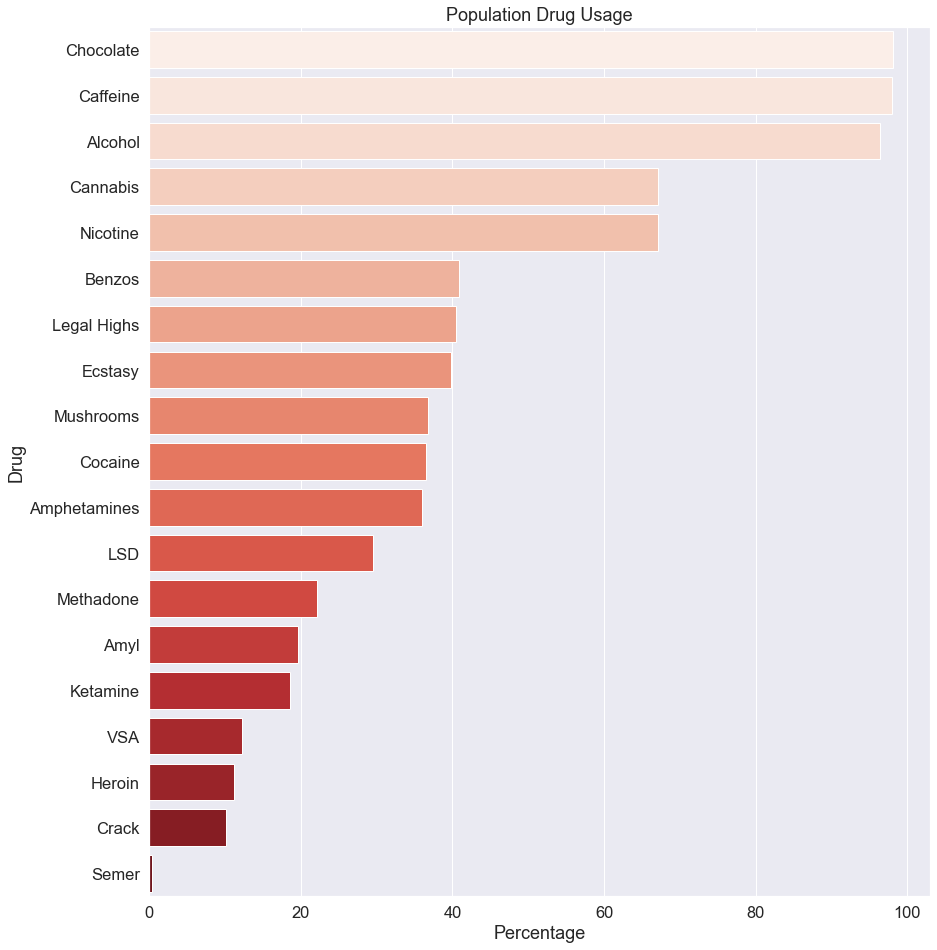

In [7]:
plt.figure(figsize=(14,16))
sns.set(font_scale=1.5)
plt.ylabel('Drug')
plt.title('Population Drug Usage')
sns.barplot(x=usg_percent, y=drug, palette='Reds').set(xlabel='Percentage')

In [8]:
#drop semer column of dataset
df = df.drop(columns=['Semer'])

Semer is dropped from the dataframe as only about 1% of the population consumes it, which is quite frankly surprising as it is not a real drug and was introduced by researchers to identify over claimers.

### Distribution of drug consumption of nicotine for age, gender, ethnicity, education and country

In [9]:
#explore value counts of age groups
df.Age.value_counts()

18-24    643
25-34    481
35-44    356
45-54    294
55-64     93
65+       18
Name: Age, dtype: int64

In [10]:
#combine the low count age groups of 55-64 and 65+ to just one group of 55+
df['Age'] = df['Age'].replace(dict.fromkeys(['55-64','65+'], '55+'))

In [11]:
nico_age = df.loc[:,['Age','Nicotine']]
nico_age_grouped = nico_age.groupby('Age')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
age = [i for i, j in nico_age_grouped.index if j=='User']
usg_percent = [round(nico_age_grouped[i][j]*100,2) for i, j in nico_age_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

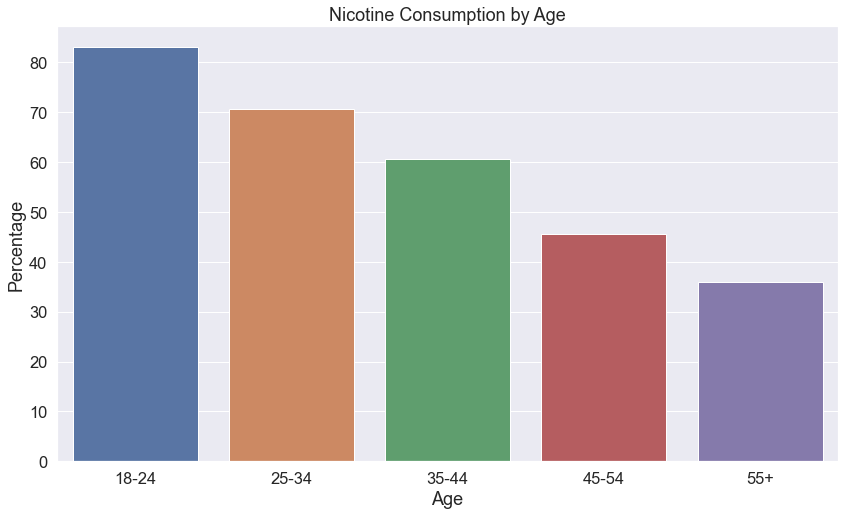

In [12]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xlabel('Age')
plt.title('Nicotine Consumption by Age')
sns.barplot(x=age, y=usg_percent).set(ylabel='Percentage')

In [13]:
#explore value counts of gender groups
df.Gender.value_counts()

Male      943
Female    942
Name: Gender, dtype: int64

In [14]:
nico_gen = df.loc[:,['Gender','Nicotine']]
nico_gen_grouped = nico_gen.groupby('Gender')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
gen = [i for i, j in nico_gen_grouped.index if j=='User']
usg_percent = [round(nico_gen_grouped[i][j]*100,2) for i, j in nico_gen_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

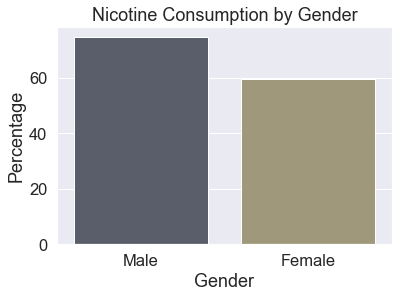

In [15]:
#plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xlabel('Gender')
plt.title('Nicotine Consumption by Gender')
sns.barplot(x=gen, y=usg_percent, palette='cividis').set(ylabel='Percentage')

In [16]:
#explore value counts of education groups
df.Education.value_counts()

Some college/university             506
Bachelors                           480
Masters                             283
Professional certificate/diploma    270
Left school at 18                   100
Left school at 16                    99
Doctorate                            89
Left school at 17                    30
Left school before 16                28
Name: Education, dtype: int64

In [17]:
#combine the least represented education groups to one group 'left school at 17 or younger'
df['Education'] = df['Education'].replace(dict.fromkeys(['Left school at 17','Left school at 16','Left school before 16'], 'Left school at 17 or younger'))

In [18]:
nico_edu = df.loc[:,['Education','Nicotine']]
nico_edu_grouped = nico_edu.groupby('Education')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
edu = [i for i, j in nico_edu_grouped.index if j=='User']
usg_percent = [round(nico_edu_grouped[i][j]*100,2) for i, j in nico_edu_grouped.index if j=='User']

[Text(0.5, 0, 'Percentage')]

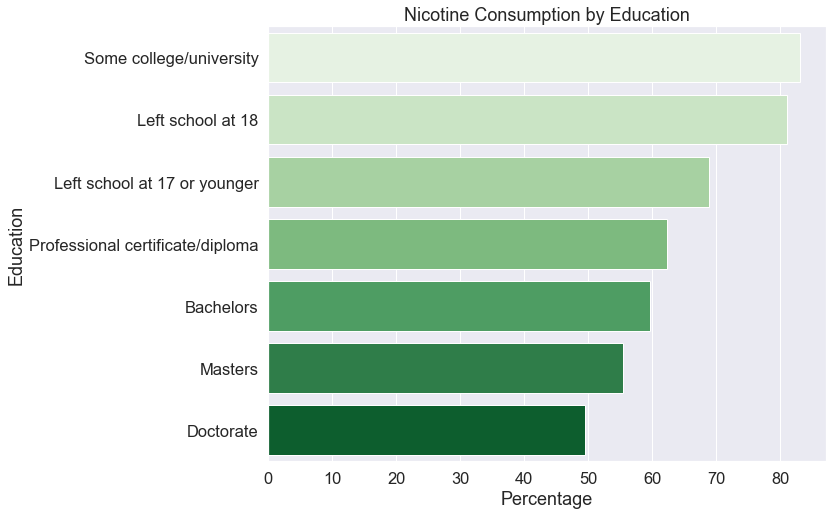

In [19]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
plt.ylabel('Education')
plt.title('Nicotine Consumption by Education')
sns.barplot(x=usg_percent, y=edu, palette='Greens').set(xlabel='Percentage')

In [20]:
##explore value counts of country groups
df.Country.value_counts()

UK                     1044
USA                     557
Other                   118
Canada                   87
Australia                54
Republic of Ireland      20
New Zealand               5
Name: Country, dtype: int64

In [21]:
#combine least represented groups to the 'Other' group
df['Country'] = df['Country'].replace(dict.fromkeys(['Australia','Republic of Ireland','New Zealand'], 'Other'))

In [22]:
nico_cntry = df.loc[:,['Country','Nicotine']]
nico_cntry_grouped = nico_cntry.groupby('Country')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
cntry = [i for i, j in nico_cntry_grouped.index if j=='User']
usg_percent = [round(nico_cntry_grouped[i][j]*100,2) for i, j in nico_cntry_grouped.index if j=='User']

[Text(0.5, 0, 'Percentage')]

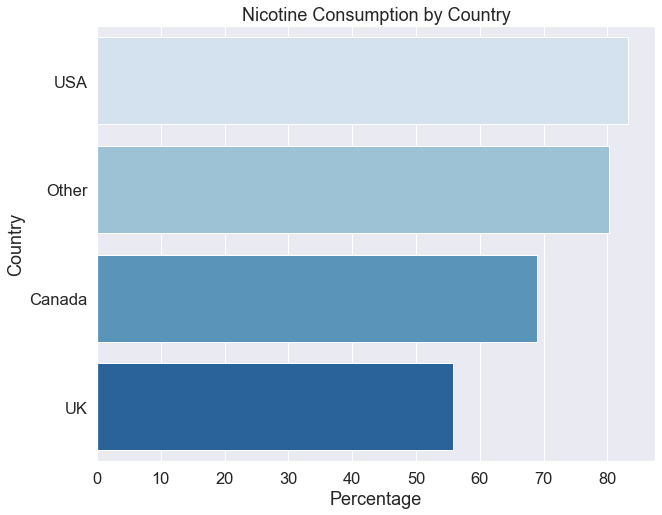

In [23]:
plt.figure(figsize=(10,8))
sns.set(font_scale=1.5)
plt.ylabel('Country')
plt.title('Nicotine Consumption by Country')
sns.barplot(x=usg_percent, y=cntry, palette='Blues').set(xlabel='Percentage')

In [24]:
nico_eth = df.loc[:,['Ethnicity','Nicotine']]
nico_eth_grouped = nico_eth.groupby('Ethnicity')['Nicotine'].value_counts(normalize=True).sort_values(ascending=False)
eth = [i for i, j in nico_eth_grouped.index if j=='User']
usg_percent = [round(nico_eth_grouped[i][j]*100,2) for i, j in nico_eth_grouped.index if j=='User']

[Text(0, 0.5, 'Percentage')]

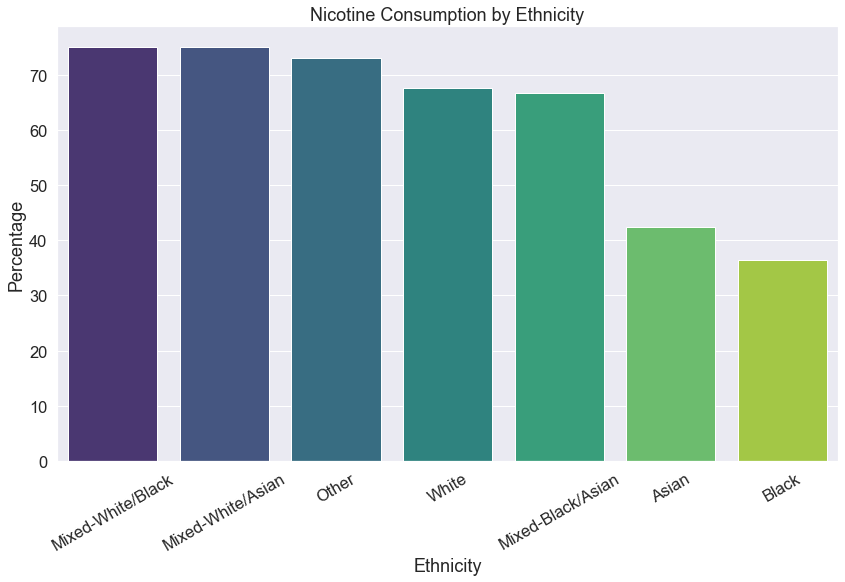

In [25]:
plt.figure(figsize=(14,8))
sns.set(font_scale=1.5)
plt.xticks(rotation=30)
plt.xlabel('Ethnicity')
plt.title('Nicotine Consumption by Ethnicity')
sns.barplot(x=eth, y=usg_percent, palette='viridis').set(ylabel='Percentage')

In [26]:
#explore value counts of ethnicity groups
df.Ethnicity.value_counts()

White                1720
Other                  63
Black                  33
Asian                  26
Mixed-White/Asian      20
Mixed-White/Black      20
Mixed-Black/Asian       3
Name: Ethnicity, dtype: int64

In [27]:
#drop ethnicity column of dataset majority is white, not very indicative of other ethnicities
df = df.drop(columns=['Ethnicity'])

### Variability of big 5 personality score between nicotine users and non-users

In [28]:
#melt and seperate features of interest
nico_big5 = df.loc[:,['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness','Nicotine']]

nico_big5_melted = pd.melt(nico_big5, id_vars=['Nicotine'], value_vars=['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness'], var_name='Big 5 Personality Traits', value_name='Score')
nico_big5_melted.head()

,Nicotine,Big 5 Personality Traits,Score
0,User,Neuroticism,39.0
1,User,Neuroticism,29.0
2,Non-user,Neuroticism,31.0
3,User,Neuroticism,34.0
4,User,Neuroticism,43.0


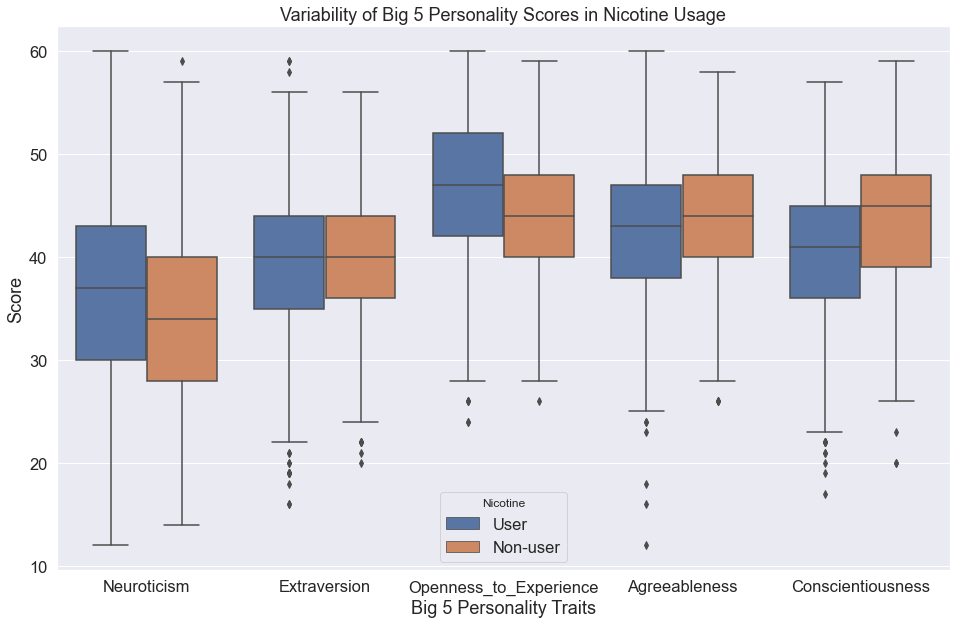

In [29]:
plt.figure(figsize=(16,10))
sns.set(font_scale=1.5)
plt.title('Variability of Big 5 Personality Scores in Nicotine Usage')
sns.boxplot(x="Big 5 Personality Traits", y="Score", hue='Nicotine', data=nico_big5_melted)

In [30]:
#we can perform a t-test and calculate p-values to verify which traits are statistically significant to nicotine consumption

big5 = ['Neuroticism','Extraversion','Openness_to_Experience','Agreeableness','Conscientiousness']

for trait in big5:
    p_trait = nico_big5_melted[nico_big5_melted['Big 5 Personality Traits'] == trait]
    users = p_trait.loc[p_trait['Nicotine'] == 'User', 'Score']
    non_users = p_trait.loc[p_trait['Nicotine'] == 'Non-user', 'Score']

    stat, p = ss.ttest_ind(users, non_users) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between users and non-users of nicotine who have the", trait, " trait.\nP-value:{p}.\n".format(p =p))
    else:
        print(trait, "is not statistically significant.")
        print(p,'\n')

There is a statistically significant difference between users and non-users of nicotine who have the Neuroticism  trait.
P-value:2.0670744438881825e-08.

Extraversion is not statistically significant.
0.5913074208312263 

There is a statistically significant difference between users and non-users of nicotine who have the Openness_to_Experience  trait.
P-value:7.606811100520037e-20.

There is a statistically significant difference between users and non-users of nicotine who have the Agreeableness  trait.
P-value:3.3917035367820075e-07.

There is a statistically significant difference between users and non-users of nicotine who have the Conscientiousness  trait.
P-value:6.799842513602043e-19.



### Variability of impulsiveness and sensation-seeking between nicotine users and non-users

In [31]:
#melt and seperate features of interest
nico_impSS = df.loc[:,['Impulsiveness','Sensation-Seeking','Nicotine']]

nico_impSS_melted = pd.melt(nico_impSS, id_vars=['Nicotine'], value_vars=['Impulsiveness','Sensation-Seeking'], var_name='Impulsiveness/SS', value_name='Score')
nico_impSS_melted.head()

,Nicotine,Impulsiveness/SS,Score
0,User,Impulsiveness,-0.21712
1,User,Impulsiveness,-0.71126
2,Non-user,Impulsiveness,-1.37983
3,User,Impulsiveness,-1.37983
4,User,Impulsiveness,-0.21712


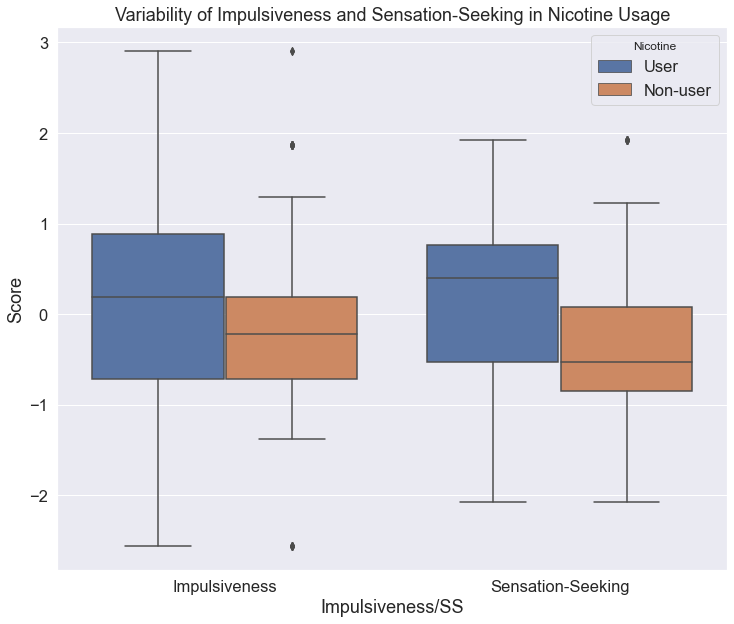

In [32]:
plt.figure(figsize=(12,10))
sns.set(font_scale=1.5)
plt.title('Variability of Impulsiveness and Sensation-Seeking in Nicotine Usage')
sns.boxplot(x="Impulsiveness/SS", y="Score", hue='Nicotine', data=nico_impSS_melted)

In [33]:
#we can perform a t-test and calculate p-values to verify which traits are statistically significant to nicotine consumption

impSS = ['Impulsiveness','Sensation-Seeking']

for trait in impSS:
    p_trait = nico_impSS_melted[nico_impSS_melted['Impulsiveness/SS'] == trait]
    users = p_trait.loc[p_trait['Nicotine'] == 'User', 'Score']
    non_users = p_trait.loc[p_trait['Nicotine'] == 'Non-user', 'Score']

    stat, p = ss.ttest_ind(users, non_users) 
    
    if p < 0.05: #using 95% confidence interval, can be adjusted for different values
        print("There is a statistically significant difference between users and non-users of nicotine who have the", trait, " trait.\nP-value:{p}.\n".format(p =p))
    else:
        print(trait, "is not statistically significant.")
        print(p,'\n')

There is a statistically significant difference between users and non-users of nicotine who have the Impulsiveness  trait.
P-value:5.051142879790059e-21.

There is a statistically significant difference between users and non-users of nicotine who have the Sensation-Seeking  trait.
P-value:8.746025463241486e-41.



### Significance testing of categorical features

In [34]:
#see what categorical features are significantly correlated to nicotine
from scipy.stats import chi2_contingency
cat = df.select_dtypes(include='object')
sig = []
for x in cat.columns:
    table = pd.crosstab(cat[x], cat['Nicotine'])
    chi2, p, dof, expected = chi2_contingency(table.values)
    
    if p < 0.05:
        sig.append(x)
        print(x, 'is significantly correlated to Nicotine usage.')
        print('Chi-square value: %0.3f // p-value: %0.5f' %(chi2,p))
        print('\n')

Age is significantly correlated to Nicotine usage.
Chi-square value: 193.614 // p-value: 0.00000


Gender is significantly correlated to Nicotine usage.
Chi-square value: 47.290 // p-value: 0.00000


Education is significantly correlated to Nicotine usage.
Chi-square value: 111.941 // p-value: 0.00000


Country is significantly correlated to Nicotine usage.
Chi-square value: 142.556 // p-value: 0.00000


Alcohol is significantly correlated to Nicotine usage.
Chi-square value: 22.620 // p-value: 0.00000


Amphetamines is significantly correlated to Nicotine usage.
Chi-square value: 219.666 // p-value: 0.00000


Amyl is significantly correlated to Nicotine usage.
Chi-square value: 71.206 // p-value: 0.00000


Benzos is significantly correlated to Nicotine usage.
Chi-square value: 126.603 // p-value: 0.00000


Caffeine is significantly correlated to Nicotine usage.
Chi-square value: 37.395 // p-value: 0.00000


Cannabis is significantly correlated to Nicotine usage.
Chi-square value: 532.

### Correlation of features

In [35]:
#drop id column
data = df.drop(columns='ID')

#seperate numerical and categorical features
numerical = list(data.select_dtypes(exclude='object').columns)
categorical = list(data.select_dtypes(include='object').columns)

print(numerical)
print(categorical)
print(len(data.columns))

['Neuroticism', 'Extraversion', 'Openness_to_Experience', 'Agreeableness', 'Conscientiousness', 'Impulsiveness', 'Sensation-Seeking']
['Age', 'Gender', 'Education', 'Country', 'Alcohol', 'Amphetamines', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal Highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'VSA']
29


In [36]:
#seperate binomial from multilevel categorical values
multi_cat = [i for i in data.iloc[:,0:4].columns]
bino_cat = [i for i in data.iloc[:,11:29].columns]

multi_cat.remove('Gender')
bino_cat.append('Gender')

print(multi_cat)
print(bino_cat)

['Age', 'Education', 'Country']
['Alcohol', 'Amphetamines', 'Amyl', 'Benzos', 'Caffeine', 'Cannabis', 'Chocolate', 'Cocaine', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legal Highs', 'LSD', 'Methadone', 'Mushrooms', 'Nicotine', 'VSA', 'Gender']


In [37]:
#replace 'User' strings into 0, 1 to conduct point biserial testing
data[bino_cat] = data[bino_cat].replace(('Non-user','User'),(0,1))
data['Gender'] = data['Gender'].replace(('Female','Male'),(0,1))
data.head()

,Age,Gender,Education,Country,Neuroticism,Extraversion,Openness_to_Experience,Agreeableness,Conscientiousness,Impulsiveness,...,Crack,Ecstasy,Heroin,Ketamine,Legal Highs,LSD,Methadone,Mushrooms,Nicotine,VSA
0,35-44,0,Professional certificate/diploma,UK,39.0,36.0,42.0,37.0,42.0,-0.21712,...,0,0,0,0,0,0,0,0,1,0
1,25-34,1,Doctorate,UK,29.0,52.0,55.0,48.0,41.0,-0.71126,...,0,1,0,1,0,1,1,0,1,0
2,35-44,1,Professional certificate/diploma,UK,31.0,45.0,40.0,32.0,34.0,-1.37983,...,0,0,0,0,0,0,0,0,0,0
3,18-24,0,Masters,UK,34.0,34.0,46.0,47.0,46.0,-1.37983,...,0,0,0,1,0,0,0,0,1,0
4,35-44,0,Doctorate,UK,43.0,28.0,43.0,41.0,50.0,-0.21712,...,0,0,0,0,0,0,0,1,1,0


In [38]:
#this function is used to get correlation between categorical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [39]:
#this function is used for correlation between multi-level categorical features (non-binomial) and numerical features
# extracted from https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

In [40]:
columns = data.columns
corr = pd.DataFrame(index=columns, columns=columns)

for i in range(0, len(columns)):
    for j in range(i, len(columns)):                   
                    
            if i == j:
                corr_factor = 1.0
            
            elif (columns[i] in categorical) and ((columns[j] in categorical)):
                corr_factor =  cramers_v(data[columns[j]], data[columns[i]])
                table = pd.crosstab(cat[columns[j]], cat[columns[i]])
                chi2, pvalue, dof, expected = chi2_contingency(table.values)
                if pvalue > 0.05:
                    corr_factor = np.nan
            
            elif (columns[i] in numerical) and (columns[j] in numerical):
                corr_factor, pvalue = ss.pearsonr(data[columns[j]], data[columns[i]])
                if pvalue > 0.05:
                    corr_factor = np.nan
            
            elif (columns[i] in numerical) and ((columns[j] in multi_cat)):
                corr_factor =  correlation_ratio(data[columns[j]], data[columns[i]])
                
            elif (columns[i] in multi_cat) and ((columns[j] in numerical)):
                corr_factor =  correlation_ratio(data[columns[i]], data[columns[j]])
            
            else:
                #if categorical variable is binomial use points biserial
                corr_factor, pvalue = ss.pointbiserialr(data[columns[j]], data[columns[i]])
                
                if pvalue > 0.05:
                    corr_factor = np.nan
                
            corr.loc[columns[j],columns[i]] = corr_factor

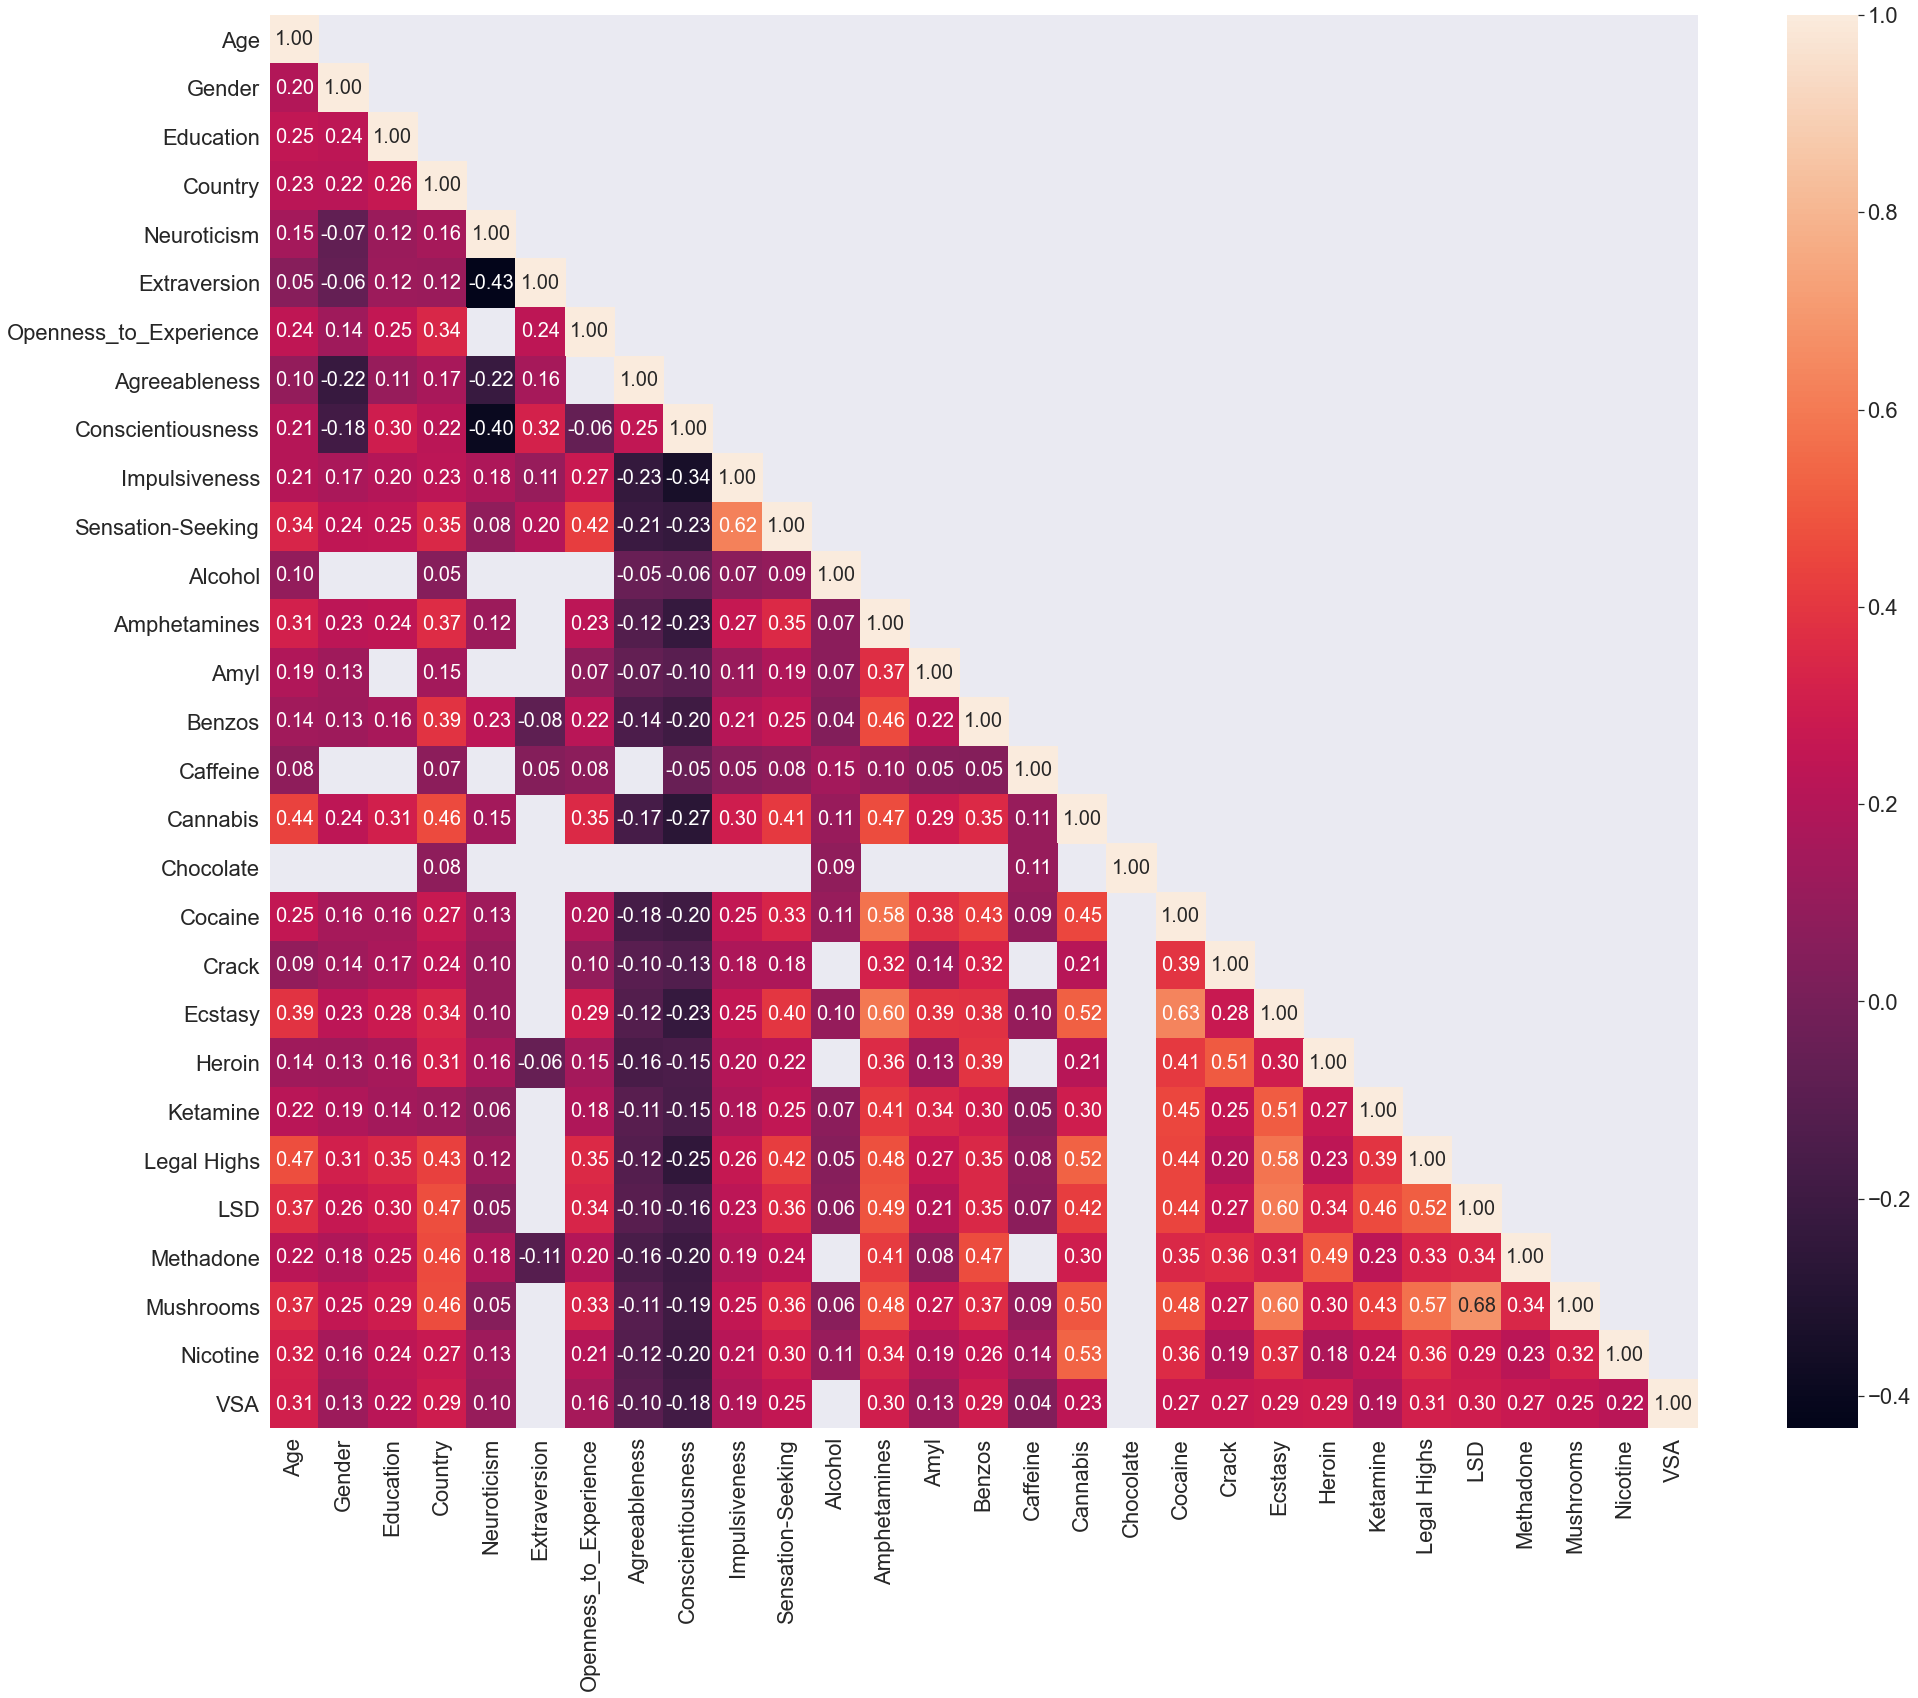

In [41]:
corr.fillna(value=np.nan,inplace=True)
plt.figure(figsize=(32,26))
sns.set(font_scale=2) 
sns.heatmap(corr,annot=True,fmt='.2f',annot_kws={"size": 20})
plt.show()

### Export data to CSV for pre-processing

In [42]:
df.to_csv('drug_consumption_pp.csv')